In [3]:
class Node:
    def __init__(self, id, radius=None, total_time=None, level=0):
        self.id = id
        self.radius = radius
        self.total_time = total_time
        self.level = level
        self.children = []
        self.visit_count = 0
        self.value = 0.0  # For MCTS
        self.parent = None  # For MCTS

    def add_child(self, node):
        """Adds a child to the current node."""
        node.level = self.level + 1
        node.parent = self  # Set parent for MCTS
        self.children.append(node)
        
    def delete_child(self, node):
        """Removes a child from the current node."""
        if node in self.children:
            self.children.remove(node)

    def display(self):
        """Displays the current node's information."""
        print(f"Node ID: {self.id}, Radius: {self.radius}, Total Time: {self.total_time}")

    def traverse(self):
        """Traverses and displays the tree starting from the current node."""
        self.display()
        for child in self.children:
            child.traverse()

    def get_nodes(self):
        """Returns all nodes in the tree starting from the current node."""
        nodes = [self]
        for child in self.children:
            nodes.extend(child.get_nodes())
        return nodes

    def ucb1(self, exploration_constant=1.41):
        """Calculates the UCB1 value for MCTS."""
        if self.visit_count == 0:
            return float('inf')
        parent_visits = self.parent.visit_count if self.parent is not None else 1
        return self.value / self.visit_count + exploration_constant * math.sqrt(
            math.log(parent_visits) / self.visit_count)

    def best_child(self):
        """Returns the best child based on UCB1 values."""
        return min(self.children, key=lambda node: node.ucb1(), default=None)

    def fully_expanded(self):
        """Checks if the node is fully expanded."""
        return len(self.radius) == len(waypoints) - 1  # -1 since the sequence length is one less than waypoints

    def update(self, reward):
        """Updates the node's value and visit count based on the given reward."""
        self.visit_count += 1
        self.value += reward




__main__.Node

In [5]:
def tsp_output_to_tree(tsp_output, waypoints, radii):
    nodes_in_order = tsp_output.split()
    nodes_in_order = [int(node) for node in nodes_in_order if node.isdigit()]

    # Create root node (start)
    root = Node(id=0, radius=None, total_time=0)
    
    # Global counter for node ID
    node_counter = [1]  # Using a list so it's mutable inside nested functions

    def add_node(parent, waypoint_index):
        if waypoint_index >= len(nodes_in_order):
            return

        for r in radii:
            total_time = parent.total_time + r
            child = Node(id=node_counter[0], radius=r, total_time=total_time)
            parent.add_child(child)
            node_counter[0] += 1  # Increment global node ID counter
            add_node(child, waypoint_index + 1)

    add_node(root, 1)

    return root




In [15]:

waypoints = [(20, 10), (24, 37), (36, 43)]
NUM_WAYPOINTS = len(waypoints)
plan_output = "0 -> 1 -> 2 -> 0 "
radii = [2,5]
TIME_BETWEEN_NODES = 1
MAX_TIME_LIMIT = 20

In [16]:
root = tsp_output_to_tree(plan_output, waypoints, radii)

In [17]:
root.traverse()

Node ID: 0, Total Distance: None, UGV Energy: None, UAV Energy: None, Distance to Next: None, Radius: None, Total Time: 0
Node ID: 1, Total Distance: None, UGV Energy: None, UAV Energy: None, Distance to Next: None, Radius: 2, Total Time: 2
Node ID: 2, Total Distance: None, UGV Energy: None, UAV Energy: None, Distance to Next: None, Radius: 2, Total Time: 4
Node ID: 3, Total Distance: None, UGV Energy: None, UAV Energy: None, Distance to Next: None, Radius: 2, Total Time: 6
Node ID: 4, Total Distance: None, UGV Energy: None, UAV Energy: None, Distance to Next: None, Radius: 5, Total Time: 9
Node ID: 5, Total Distance: None, UGV Energy: None, UAV Energy: None, Distance to Next: None, Radius: 5, Total Time: 7
Node ID: 6, Total Distance: None, UGV Energy: None, UAV Energy: None, Distance to Next: None, Radius: 2, Total Time: 9
Node ID: 7, Total Distance: None, UGV Energy: None, UAV Energy: None, Distance to Next: None, Radius: 5, Total Time: 12
Node ID: 8, Total Distance: None, UGV Energy

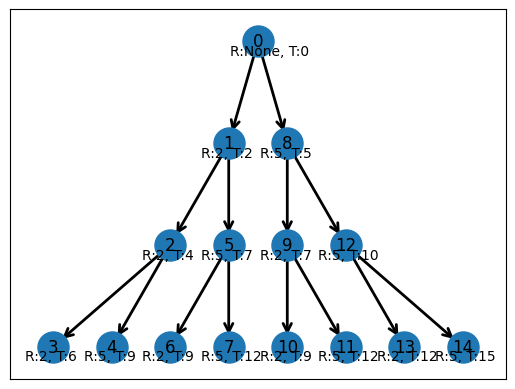

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
def draw_tree(root):
    def add_edges(graph, node):
        for child in node.children:
            graph.add_edge(node.id, child.id)
            add_edges(graph, child)

    G = nx.DiGraph()
    add_edges(G, root)

    # Get all nodes and sort by level
    all_nodes = sorted(root.get_nodes(), key=lambda node: node.level)

    # Count nodes per level
    level_counts = defaultdict(int)

    # Assign positions
    pos = {}
    for node in all_nodes:
        pos[node.id] = (level_counts[node.level], -node.level)
        level_counts[node.level] += 1

    # Adjust x-positions to center nodes on each level
    for node in all_nodes:
        x_adjust = -0.5 * (level_counts[node.level] - 1)
        pos[node.id] = (pos[node.id][0] + x_adjust, pos[node.id][1])

    # Nodes
    nx.draw_networkx_nodes(G, pos, node_size=500)

    # Edges
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=15, width=2)

    # Labels
    nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

    # Node data annotations
    for node in all_nodes:
        plt.annotate(
            f'R:{node.radius}, T:{node.total_time}',
            xy=pos[node.id], textcoords='offset points', xytext=(-20,-10))

    plt.show()

# Generating the tree
root_node = tsp_output_to_tree(plan_output, waypoints, radii)

# Drawing the tree
draw_tree(root_node)
